<a href="https://colab.research.google.com/github/susan8653/susan8653/blob/master/heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdirve/')

Mounted at /content/gdirve/


#setting

###Import&Install Package

In [93]:
import os
import glob
import numpy as np
import pandas as pd
import tarfile
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

###Data labeling & Loading

In [3]:
def Load_Dataframe(path, genome_list):
  tar_list = os.listdir(path) #다운로드 된 경로 
  genome_path = f'{path}../genome_data/' # 같은 위치에 파일 생성
  df = pd.DataFrame()

  for idx,f in enumerate(tar_list):
    genome = genome_list[idx] # 암 명칭 입력 
    # 다운받은 파일 압축해제
    ap = tarfile.open(path + f) 
    ap.extractall(genome_path) # 압축 해제 된 파일 저장
    ap.close 
    # 폴더 명 암 이름으로 변경
    f_old = os.path.join(genome_path, f.split('.tar')[0]) 
    f_new = os.path.join(genome_path, f'{genome}')
    os.rename(f_old, f_new) 
    # 암 txt 파일 불러오기
    txt_list = os.listdir(f'{genome_path}{genome}/')
    file = ''.join([i for i in txt_list if str(genome) in i])
    data = pd.read_csv(f'{genome_path+genome}/{file}', sep='\t', low_memory=False, index_col='Hybridization REF', skiprows=[1])
    # 형태 변경, 타겟 변수 생성
    # data = data.transpose()
    # data.drop(columns='gene_id', inplace=True)
    # data['target'] = genome
    # df = pd.concat([df, data])

  return data

In [4]:
def Load_Dataframe(path, genome_list):
  df = pd.DataFrame() # 암 데이터를 합쳐서 출력 받을 최종 df

  path_list= os.listdir(path) # 압축해제된 파일 경로
  for idx, f in enumerate(path_list):
    genome = genome_list[idx] # 불러올 암 이름 입력 받기
    genome_file = os.listdir(f'{path}/{genome}/') # 해당 암의 폴더로 들어가기
    txt = ''.join([i for i in genome_file if str(genome)in i]) # 필요한 파일만 출력
    # 파일 불러오기
    data = pd.read_csv(f'{path}/{genome}/{txt}', sep='\t', low_memory=False, index_col='Hybridization REF', skiprows=[1])
    data = data.transpose()
    #데이터 라벨링
    data['Target'] = data.index.str[13:15]
    data['Target'] = data['Target'].replace({'01':'Tumor', '02':'Tumor', '11':'Normal', '10':'Normal'})
    data['Target'] = genome +'_'+ data['Target']
    df = pd.concat([df, data])
    
  return df

In [5]:
path = '/content/gdirve/MyDrive/공모전/genome_data' # load할 데이터 경로
genome_list = ['LUAD', 'LUSC'] #입력 받는 암 데이터 명
df = Load_Dataframe(path, genome_list)

In [ ]:
df

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-05-4244-01A-01R-1107-07,0.0,10.0113,11.2820,49.5994,848.9397,0.0,345.2308,1.0472,0.0000,0.0,...,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0000,LUAD_Tumor
TCGA-05-4249-01A-01R-1107-07,0.0,7.1957,12.4436,90.5117,924.0158,0.0,145.2025,1.6098,0.0000,0.0,...,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0000,LUAD_Tumor
TCGA-05-4250-01A-01R-1107-07,0.0,7.2453,6.0184,49.5366,1140.6781,0.0,51.7284,0.0000,0.0000,0.0,...,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0000,LUAD_Tumor
TCGA-05-4382-01A-01R-1206-07,0.0,11.3311,7.5740,82.8303,807.1729,0.0,240.0221,0.4786,0.2393,0.0,...,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0000,LUAD_Tumor
TCGA-05-4384-01A-01R-1755-07,0.0,3.2254,3.4942,72.5351,562.0037,0.0,274.2822,0.6109,0.0000,0.0,...,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0000,LUAD_Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52S-01A-11R-A262-07,0.0,19.9503,47.1026,176.7177,1188.3278,0.0,226.8212,1.6556,0.0000,0.0,...,507.4503,1392.7980,126.2417,580.2980,2681.7053,1069.5364,783.1126,5.3808,1.2417,LUSC_Tumor
TCGA-O2-A52V-01A-31R-A262-07,0.0,30.0872,15.2957,188.7215,1248.0303,0.0,147.4945,0.4202,0.0000,0.0,...,366.8453,1326.6099,6.3032,845.8872,6094.3376,663.9353,778.6532,2.1011,0.0000,LUSC_Tumor
TCGA-O2-A52W-01A-11R-A26W-07,0.0,53.6593,33.3907,260.3332,789.3606,0.0,854.3794,0.0000,0.0000,0.0,...,336.9156,2002.6867,101.5583,613.6486,2560.9887,730.2526,761.9559,12.3589,0.0000,LUSC_Tumor
TCGA-O2-A5IB-01A-11R-A27Q-07,0.0,72.5666,42.1832,160.1624,460.8626,0.0,569.2226,1.3312,0.0000,0.0,...,584.1321,2074.5474,150.4260,1155.2183,1185.0373,833.3333,1383.1203,1.0650,0.0000,LUSC_Tumor


In [7]:
data_Tumor = df[df['Target'].str.contains('Tumor')]

data_Tumor['Target'] = LabelEncoder().fit_transform(data_Tumor['Target'])
data_Tumor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Target
TCGA-05-4244-01A-01R-1107-07,0.0,10.0113,11.2820,49.5994,848.9397,0.0,345.2308,1.0472,0.0000,0.0,...,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0000,0
TCGA-05-4249-01A-01R-1107-07,0.0,7.1957,12.4436,90.5117,924.0158,0.0,145.2025,1.6098,0.0000,0.0,...,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0000,0
TCGA-05-4250-01A-01R-1107-07,0.0,7.2453,6.0184,49.5366,1140.6781,0.0,51.7284,0.0000,0.0000,0.0,...,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0000,0
TCGA-05-4382-01A-01R-1206-07,0.0,11.3311,7.5740,82.8303,807.1729,0.0,240.0221,0.4786,0.2393,0.0,...,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0000,0
TCGA-05-4384-01A-01R-1755-07,0.0,3.2254,3.4942,72.5351,562.0037,0.0,274.2822,0.6109,0.0000,0.0,...,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52S-01A-11R-A262-07,0.0,19.9503,47.1026,176.7177,1188.3278,0.0,226.8212,1.6556,0.0000,0.0,...,507.4503,1392.7980,126.2417,580.2980,2681.7053,1069.5364,783.1126,5.3808,1.2417,1
TCGA-O2-A52V-01A-31R-A262-07,0.0,30.0872,15.2957,188.7215,1248.0303,0.0,147.4945,0.4202,0.0000,0.0,...,366.8453,1326.6099,6.3032,845.8872,6094.3376,663.9353,778.6532,2.1011,0.0000,1
TCGA-O2-A52W-01A-11R-A26W-07,0.0,53.6593,33.3907,260.3332,789.3606,0.0,854.3794,0.0000,0.0000,0.0,...,336.9156,2002.6867,101.5583,613.6486,2560.9887,730.2526,761.9559,12.3589,0.0000,1
TCGA-O2-A5IB-01A-11R-A27Q-07,0.0,72.5666,42.1832,160.1624,460.8626,0.0,569.2226,1.3312,0.0000,0.0,...,584.1321,2074.5474,150.4260,1155.2183,1185.0373,833.3333,1383.1203,1.0650,0.0000,1


###Train/Test Split

In [8]:
X_features = data_Tumor.iloc[:, :-1]
y_target = data_Tumor.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X_features, y_target, 
                                                    test_size=0.2, random_state=97, 
                                                    stratify=y_target)

#RandomForest



In [10]:
### RandomForest
Ran_params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
Ran_model = RandomForestClassifier()
grid_Ran = GridSearchCV(Ran_model, param_grid=Ran_params, cv=2, n_jobs=-1)
grid_Ran.fit(X_train, Y_train)
 
 
print('RandomForest 최적의 하이퍼 파라미터:', grid_Ran.best_params_)
print('RandomForest 최적의 예측 정확도: {0:.4f}'.format(grid_Ran.best_score_))

RandomForest 최적의 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
RandomForest 최적의 예측 정확도: 0.9570


In [11]:
RandomForest_model = RandomForestClassifier(random_state=0, max_depth=8, min_samples_leaf=8, min_samples_split=8,n_estimators=100)
RandomForest_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                       random_state=0)

In [12]:
Ran_test_predict = RandomForest_model.predict(X_test)
Ran_acc = accuracy_score(Ran_test_predict, Y_test)
print("RandomForest Accuracy : {}".format(Ran_acc))

RandomForest Accuracy : 0.9362745098039216


In [79]:
# 유전자 중요도 출력
clf_importances = RandomForest_model.feature_importances_
# 중요도 높은 순서 인덱스
sorted_idx = clf_importances.argsort()[::-1] 
clf_importances[sorted_idx]
topDf = pd.DataFrame(clf_importances[sorted_idx], index=X_train.columns[sorted_idx], columns=['Top Biomarker']).iloc[:10]
topDf

,Top Biomarker
Hybridization REF,
C10orf99|387695,0.023866
MUC1|4582,0.019799
NTRK2|4915,0.018414
LASS3|204219,0.017571
KRT77|374454,0.015268
FMO5|2330,0.014230
PARD6G|84552,0.013213
ATP11A|23250,0.012432
NKX2-1|7080,0.012325


Text(0.5, 1.0, 'XGBoost')

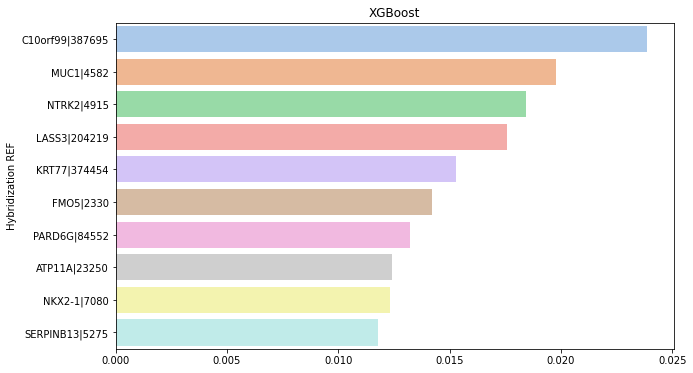

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_palette("pastel")

sns.barplot(x=list(topDf['Top Biomarker']), y=topDf.index, ax=ax)
ax.set_title('XGBoost')

###z-score & labeling

In [81]:
def z(genome_list):
  d1 = pd.DataFrame()  #최종 data

  for idx, g in enumerate(genome_list):
    data_select = data_Tumor[data_Tumor['Target']==idx]
    Topdf = data_select[topDf.index]
    #Topdf
    
    #Z-Score
    z_score = (Topdf - Topdf.mean())/Topdf.std()
    z_score = z_score.set_axis([g]*len(z_score), axis=0)
    z_score = z_score.transpose()
    d1 = pd.concat([d1, z_score], axis=1)

  return d1

In [82]:
genome_list = ['LUAD', 'LUSC'] #입력 받는 암 데이터 명
d1 = z(genome_list)

In [83]:
d1

,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,...,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
C10orf99|387695,-0.095346,-0.095346,-0.083378,-0.095346,-0.095346,-0.083234,-0.095346,-0.075969,-0.095346,-0.095346,...,0.441599,-0.516265,1.035244,-0.490007,-0.516265,-0.504332,-0.124541,-0.434673,-0.516265,0.331524
MUC1|4582,1.309119,0.098797,-0.844218,0.291618,1.483349,-0.298018,-0.697184,-0.954521,0.273639,-1.205634,...,0.803658,-0.153214,0.511273,-0.493019,1.758546,-0.760003,-0.403034,-0.314444,-0.348543,0.130380
NTRK2|4915,-0.142456,-0.164338,-0.207854,-0.204572,0.078755,-0.138604,-0.217398,-0.210109,-0.213703,-0.153867,...,-0.485114,-0.779476,-0.592733,-0.755220,-0.792468,-0.107395,0.190477,0.191896,-0.795583,0.776012
LASS3|204219,-0.068847,-0.066666,-0.068847,-0.068847,-0.064709,-0.068847,-0.068847,-0.067029,-0.063711,-0.065855,...,-0.132436,-0.955831,-0.819724,0.373955,-0.976270,-0.796492,1.442780,0.056532,-0.968893,0.486212
KRT77|374454,-0.072435,-0.072435,-0.072435,-0.072435,-0.072435,-0.072435,-0.072435,-0.072435,-0.072435,-0.052963,...,-0.297917,-0.299486,-0.269088,-0.275698,-0.301812,-0.183133,-0.290098,-0.299672,-0.301812,0.037023
FMO5|2330,-0.084821,1.169581,0.322927,-0.295162,0.031849,0.226810,0.775816,-0.700364,0.498155,-0.618046,...,-0.285920,-0.153852,-0.272214,-0.321288,-0.214517,-0.576571,-0.566432,-0.472523,0.202576,0.166916
PARD6G|84552,-0.250106,0.462459,-0.049922,0.034788,-0.167399,-0.177640,0.913468,-0.543741,-0.732400,-0.659535,...,1.241834,-0.464586,-0.976263,1.167148,-1.392826,0.306182,0.784723,-0.293595,0.116412,1.027232
ATP11A|23250,0.769963,2.464898,-0.752023,0.444422,0.475276,-0.833686,1.306946,-0.957558,3.540437,-0.859830,...,-0.572691,-0.190792,-0.472079,-0.407730,-0.393807,-0.392795,-0.369758,-0.425206,-0.069595,0.588515
NKX2-1|7080,0.294627,0.406064,-0.816932,-0.875121,1.373510,-0.480870,0.259687,-1.445023,-0.251472,-1.356273,...,-0.087146,0.173533,-0.323245,-0.194561,1.467994,-0.320759,-0.318314,-0.072995,-0.323670,0.617589


###heatmap

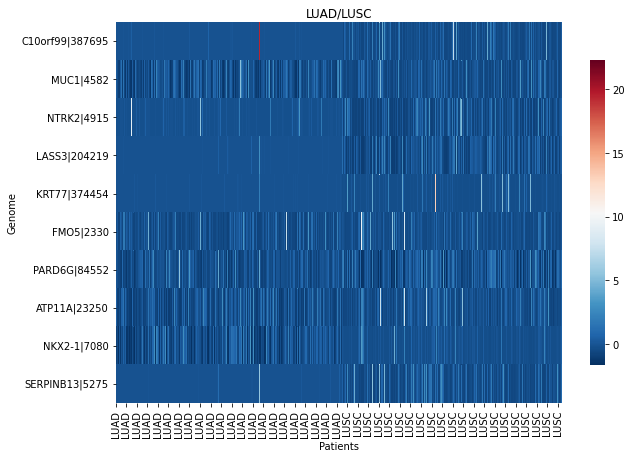

In [84]:
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(d1,
            cmap = 'RdBu_r',
            cbar_kws = {"shrink": .8}
            )

ax.set_title('LUAD/LUSC')
ax.set_xlabel('Patients')
ax.set_ylabel('Genome')

plt.show()

#XGBOOST

In [20]:
### XGBoost 
XGB_params = { 
    'learning_rate' : [0.1],
    'n_estimators' : [100],
    'max_depth' : [5],
    'min_child_weight' : [0.001],
    'subsample' : [0.8],
    'colsample_bytree' : [0.8],
    'gamma' : [0]
}

XGB_model = XGBClassifier()
grid_XGB = GridSearchCV(XGB_model, param_grid=XGB_params, cv=2, n_jobs=-1)
grid_XGB.fit(X_train, Y_train)

print('XGBoost 최적의 하이퍼 파라미터:', grid_XGB.best_params_)
print('XGBoost 최적의 예측 정확도: {0:.4f}'.format(grid_XGB.best_score_))

XGBoost 최적의 하이퍼 파라미터: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 0.001, 'n_estimators': 100, 'subsample': 0.8}
XGBoost 최적의 예측 정확도: 0.9558


In [27]:
XGBoost_model = XGBClassifier(colsample_bytree = 0.8, gamma = 0, learning_rate = 0.1, max_depth = 5, min_child_weight = 0.001, n_estimators = 100, subsample = 0.8)
XGBoost_model.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=0.8, max_depth=5, min_child_weight=0.001,
              subsample=0.8)

In [31]:
XGB_test_predict = XGBoost_model.predict(X_test)
XGB_acc = accuracy_score(XGB_test_predict, Y_test)
print("XGBoost Accuracy : {}".format(XGB_acc))

XGBoost Accuracy : 0.9411764705882353


In [86]:
# 유전자 중요도 출력
clf_importances = XGBoost_model.feature_importances_
# 중요도 높은 순서 인덱스
sorted_idx = clf_importances.argsort()[::-1] 
clf_importances[sorted_idx]
topDf = pd.DataFrame(clf_importances[sorted_idx], index=X_train.columns[sorted_idx], columns=['Top Biomarker']).iloc[:10]
topDf

,Top Biomarker
Hybridization REF,
DSC3|1825,0.118516
KRT74|121391,0.067638
LASS3|204219,0.055855
KRT5|3852,0.027174
PVRL1|5818,0.022754
TP63|8626,0.016952
GJB1|2705,0.016108
HNF1B|6928,0.012809
LRRC8E|80131,0.012238


Text(0.5, 1.0, 'XGBoost')

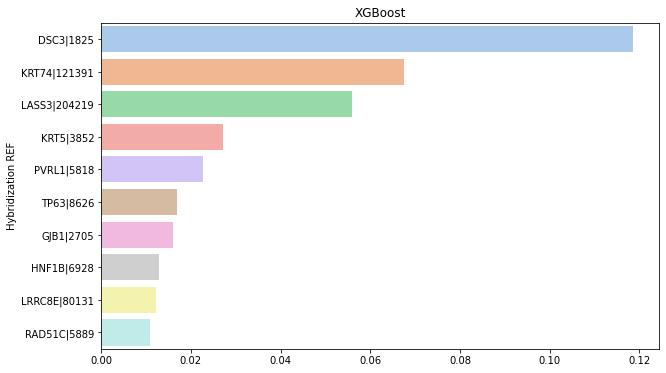

In [87]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_palette("pastel")

sns.barplot(x=list(topDf['Top Biomarker']), y=topDf.index, ax=ax)
ax.set_title('XGBoost')

###z-score & labeling

In [88]:
def z(genome_list):
  d2 = pd.DataFrame()  #최종 data

  for idx, g in enumerate(genome_list):
    data_select = data_Tumor[data_Tumor['Target']==idx]
    Topdf = data_select[topDf.index]
    #Topdf
    
    #Z-Score
    z_score = (Topdf - Topdf.mean())/Topdf.std()
    z_score = z_score.set_axis([g]*len(z_score), axis=0)
    z_score = z_score.transpose()
    d2 = pd.concat([d2, z_score], axis=1)

  return d2

In [89]:
genome_list = ['LUAD', 'LUSC'] #입력 받는 암 데이터 명
d2 = z(genome_list)

In [90]:
d2

,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,LUAD,...,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC,LUSC
Hybridization REF,,,,,,,,,,,,,,,,,,,,,
DSC3|1825,-0.164224,-0.164194,-0.146210,-0.087887,-0.165206,-0.059025,-0.167430,-0.161975,-0.168079,-0.164054,...,1.519958,-1.011220,-1.187348,0.314462,-1.133510,-0.503051,0.407646,-0.654880,-1.156338,0.414753
KRT74|121391,-0.151811,-0.151811,-0.151811,0.005620,-0.151811,-0.151811,-0.151811,0.024765,-0.151811,-0.151811,...,0.262262,-0.654916,-0.450040,-0.085173,-0.666003,6.349628,-0.331014,0.251925,-0.645788,-0.180524
LASS3|204219,-0.068847,-0.066666,-0.068847,-0.068847,-0.064709,-0.068847,-0.068847,-0.067029,-0.063711,-0.065855,...,-0.132436,-0.955831,-0.819724,0.373955,-0.976270,-0.796492,1.442780,0.056532,-0.968893,0.486212
KRT5|3852,-0.108908,-0.115952,-0.094393,-0.118101,-0.117397,-0.114494,-0.116857,-0.105867,-0.117523,-0.117818,...,0.725493,-1.111070,-0.632608,0.139840,-1.202933,-1.116561,-0.208342,0.485790,-1.090194,0.124386
PVRL1|5818,-0.764421,1.523565,0.625933,-0.386439,-0.084091,0.474686,-0.416718,-0.537139,-0.003591,-0.621004,...,0.251784,-1.056888,-0.733695,-0.533131,-1.534900,-0.561301,-0.194474,-0.365548,-1.366887,-0.222447
TP63|8626,-0.335850,0.051563,-0.211759,-0.155154,-0.043627,-0.286683,-0.352669,-0.345536,-0.337432,-0.198402,...,-0.068955,0.099285,-0.752107,-0.240428,-1.190262,1.366098,0.643531,0.221220,-1.197159,-0.076789
GJB1|2705,-0.453576,0.015319,-0.259240,-0.653371,-0.523563,1.662485,0.334641,-0.656756,1.420461,-0.483179,...,-0.153481,-0.068358,-0.094820,-0.156784,-0.173868,-0.168117,-0.168029,-0.168268,-0.140573,-0.101338
HNF1B|6928,0.692026,1.813268,-0.255401,0.409068,-0.368234,0.334706,-0.926556,-1.013434,-0.672635,-1.244042,...,-0.185086,0.249242,-0.378835,-0.260724,-0.390371,-0.390371,-0.371198,-0.233463,-0.363647,0.200268
LRRC8E|80131,0.790759,1.150387,-0.563500,-0.767242,-1.006841,-0.441836,0.281893,-1.397090,0.084884,0.247778,...,-0.580162,-0.552956,-0.403551,-0.490313,-0.696893,-0.326682,-0.266862,-0.220909,-0.429086,0.777106


###heatmap

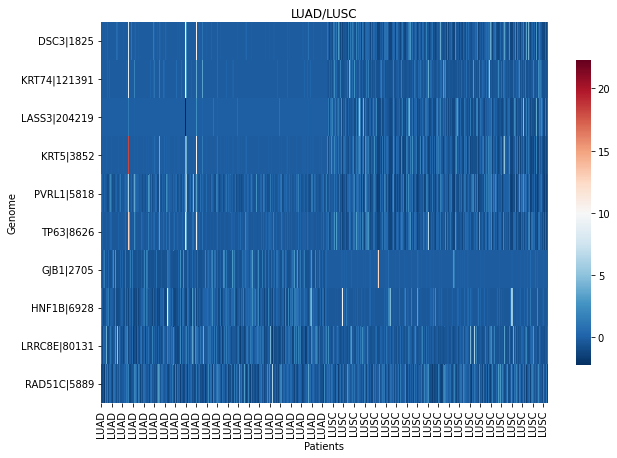

In [91]:
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(d2,
            cmap = 'RdBu_r',
            cbar_kws = {"shrink": .8}
            )

ax.set_title('LUAD/LUSC')
ax.set_xlabel('Patients')
ax.set_ylabel('Genome')

plt.show()